In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("./Online Retail.csv")

In [61]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [62]:
df.dropna(subset="CustomerID", inplace=True)

In [63]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [64]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


Quantity can not be negative so filter that greather then 0 Quantity

In [65]:
df = df[df["Quantity"] > 0]

In [66]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [67]:
df.shape

(397924, 8)

In [68]:
df["Total_Amount"] = df["Quantity"] * df["UnitPrice"]

C:\Users\91930\AppData\Local\Temp\ipykernel_12612\2824707225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total_Amount"] = df["Quantity"] * df["UnitPrice"]


In [70]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 8:26,3.39,17850.0,United Kingdom,20.34


In [71]:
df.at[0,"InvoiceDate"]

'01/12/10 8:26'

In [72]:
df.loc[0,"InvoiceDate"]

'01/12/10 8:26'

In [73]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%d/%m/%y %H:%M")

C:\Users\91930\AppData\Local\Temp\ipykernel_12612\1970589412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%d/%m/%y %H:%M")


In [74]:
df.set_index("InvoiceDate", inplace=True)

In [75]:
df.resample("ME")["InvoiceNo"].nunique()

InvoiceDate
2010-12-31    1400
2011-01-31     987
2011-02-28     998
2011-03-31    1321
2011-04-30    1149
2011-05-31    1555
2011-06-30    1393
2011-07-31    1331
2011-08-31    1281
2011-09-30    1756
2011-10-31    1929
2011-11-30    2658
2011-12-31     778
Freq: ME, Name: InvoiceNo, dtype: int64

In [76]:
df = df[df.index < "2011-12-01"]

In [77]:
df.resample("ME")["InvoiceNo"].nunique()

InvoiceDate
2010-12-31    1400
2011-01-31     987
2011-02-28     998
2011-03-31    1321
2011-04-30    1149
2011-05-31    1555
2011-06-30    1393
2011-07-31    1331
2011-08-31    1281
2011-09-30    1756
2011-10-31    1929
2011-11-30    2658
Freq: ME, Name: InvoiceNo, dtype: int64

<Axes: xlabel='InvoiceDate'>

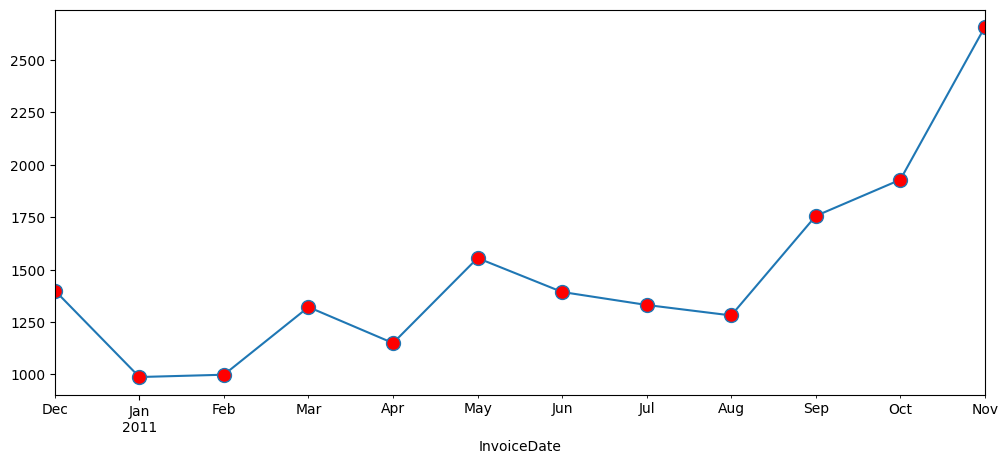

In [78]:
df.resample("ME")["InvoiceNo"].nunique().plot(figsize=(12,5), marker="o", ms=10, mfc="r")

In [79]:
df["Total_Amount"].resample("W").sum().head()

InvoiceDate
2010-12-05    149386.33
2010-12-12    213447.72
2010-12-19    163770.73
2010-12-26     46109.11
2011-01-02         0.00
Freq: W-SUN, Name: Total_Amount, dtype: float64

In [80]:
df["Total_Amount"].resample("ME").sum().head()

InvoiceDate
2010-12-31    572713.890
2011-01-31    569445.040
2011-02-28    447137.350
2011-03-31    595500.760
2011-04-30    469200.361
Freq: ME, Name: Total_Amount, dtype: float64

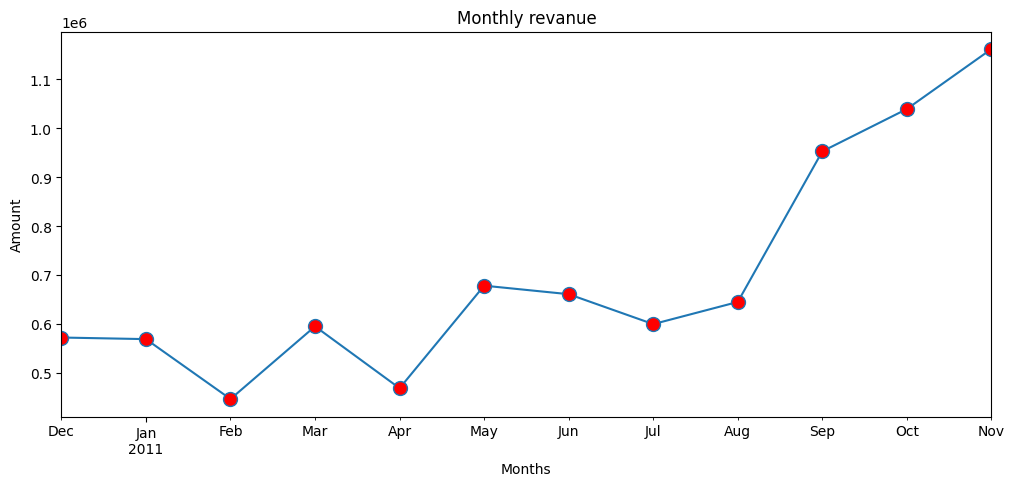

In [81]:
df["Total_Amount"].resample("ME").sum().plot(figsize=(12,5), marker="o", ms=10, mfc="r") #ms = marker size, #mfc = marker fill color
plt.title("Monthly revanue")
plt.xlabel("Months")
plt.ylabel("Amount")
plt.show()

In [82]:
df["Total_Amount"].resample("YE").sum().head()

InvoiceDate
2010-12-31     572713.890
2011-12-31    7820501.224
Freq: YE-DEC, Name: Total_Amount, dtype: float64

In [83]:
df.resample("ME")["CustomerID"].nunique()

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: ME, Name: CustomerID, dtype: int64

<Axes: xlabel='InvoiceDate'>

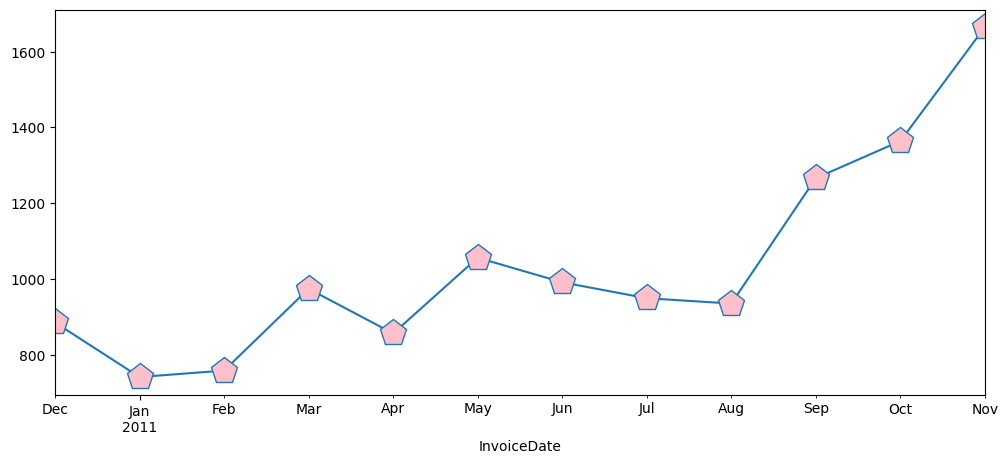

In [84]:
df.resample("ME")["CustomerID"].nunique().plot(figsize=(12,5), marker="p", ms=20, mfc="pink")

In [85]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total_Amount
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34


In [129]:
r1 = df.resample("ME")["CustomerID"].nunique()

In [105]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total_Amount
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34


In [104]:
df.groupby("CustomerID").size()

CustomerID
12346.0      1
12347.0    171
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0      7
18283.0    706
18287.0     70
Length: 4298, dtype: int64

In [124]:
result1 = (df.resample("ME").apply(lambda x: (x.groupby("CustomerID").size() > 1).sum()))
result1

InvoiceDate
2010-12-31     855
2011-01-31     717
2011-02-28     726
2011-03-31     946
2011-04-30     831
2011-05-31    1026
2011-06-30     964
2011-07-31     924
2011-08-31     902
2011-09-30    1238
2011-10-31    1342
2011-11-30    1630
Freq: ME, dtype: int64

In [122]:
result1 = (df.resample("ME").apply(lambda x: x.groupby("CustomerID").count()))
result1

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Total_Amount
CustomerID,,,,,,,
12347.0,31,31,31,31,31,31,31
12348.0,17,17,17,17,17,17,17
12370.0,91,91,91,91,91,91,91
12377.0,43,43,43,43,43,43,43
12383.0,37,37,37,37,37,37,37
...,...,...,...,...,...,...,...
18259.0,14,14,14,14,14,14,14
18263.0,16,16,16,16,16,16,16
18270.0,6,6,6,6,6,6,6


<Axes: xlabel='InvoiceDate'>

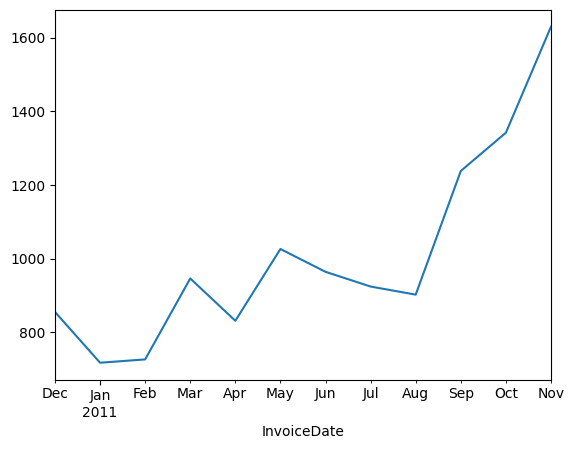

In [88]:
result.plot()

In [108]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total_Amount
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
2011-11-30 17:37:00,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,1.25,15444.0,United Kingdom,5.00
2011-11-30 17:37:00,579885,21742,LARGE ROUND WICKER PLATTER,2,5.95,15444.0,United Kingdom,11.90
2011-11-30 17:37:00,579885,23084,RABBIT NIGHT LIGHT,6,2.08,15444.0,United Kingdom,12.48


In [118]:
result = (df.resample("ME").apply(lambda x: (x.groupby("CustomerID")["InvoiceNo"].nunique() > 1).sum()))
result

InvoiceDate
2010-12-31    263
2011-01-31    149
2011-02-28    150
2011-03-31    201
2011-04-30    168
2011-05-31    279
2011-06-30    219
2011-07-31    227
2011-08-31    196
2011-09-30    271
2011-10-31    323
2011-11-30    540
Freq: ME, dtype: int64

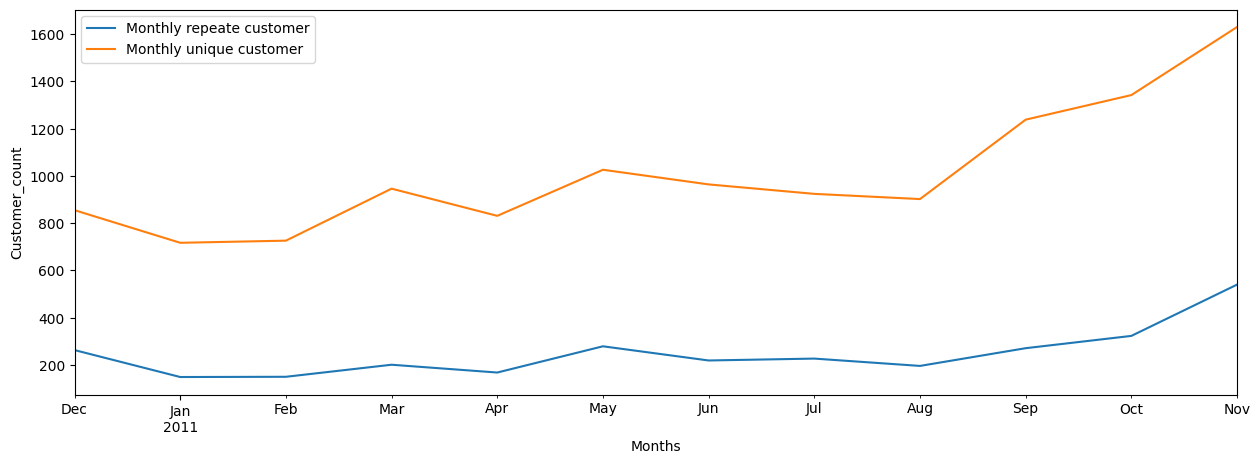

In [146]:
result.plot(figsize=(15,5), label="Monthly repeate customer")
result1.plot(label="Monthly unique customer")
plt.xlabel("Months")
plt.ylabel("Customer_count")
plt.legend()
plt.show()

# RFM = Recency Frequency Monetory

In [149]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total_Amount
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
2011-11-30 17:37:00,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,1.25,15444.0,United Kingdom,5.00
2011-11-30 17:37:00,579885,21742,LARGE ROUND WICKER PLATTER,2,5.95,15444.0,United Kingdom,11.90
2011-11-30 17:37:00,579885,23084,RABBIT NIGHT LIGHT,6,2.08,15444.0,United Kingdom,12.48


Monetary = How much money they spent

In [161]:
Monetary = df.groupby("CustomerID")["Total_Amount"].sum().reset_index()
Monetary

,CustomerID,Total_Amount
0,12346.0,77183.60
1,12347.0,4085.18
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4293,18280.0,180.60
4294,18281.0,80.82
4295,18282.0,100.21
4296,18283.0,1886.88


Frequency - How many times a customer purchased

In [163]:
df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,6
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4293,18280.0,1
4294,18281.0,1
4295,18282.0,1
4296,18283.0,15


Recency = How many days ago a customer last purchased.

Lower Recency = More recent purchase
Higher Recency = Customer hasn’t bought in a long time

In [171]:
df.index.max() + pd.Timedelta(days=1)

Timestamp('2011-12-01 17:37:00')

In [174]:
max_date = df.index.max() + pd.DateOffset(1)

In [ ]:
df["difference"] = max_date - df.index

In [179]:
df["difference"] = df["difference"].dt.days

In [188]:
df.groupby("CustomerID")["difference"].last().reset_index()

,CustomerID,difference
0,12346.0,317
1,12347.0,31
2,12348.0,67
3,12349.0,10
4,12350.0,302
...,...,...
4293,18280.0,269
4294,18281.0,172
4295,18282.0,118
4296,18283.0,1
